In [1]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
import yfinance as yf

# Get the Stock Code
df = yf.download('MEBL.KA', start='2012-01-01', end='2023-08-30')

# Show the data
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.544331,11.926766,11.148933,11.887874,6.639895,124624
2012-01-04,11.797127,11.829537,11.797127,11.829537,6.607310,30447
2012-01-05,11.829537,12.140670,11.797127,12.023995,6.715925,133387
2012-01-06,12.023995,12.153633,11.836018,12.056404,6.734028,141161
2012-01-09,12.056404,12.147151,11.998067,12.004549,6.705063,2622
...,...,...,...,...,...,...
2023-08-23,124.389999,125.000000,122.110001,124.080002,124.080002,2035400
2023-08-24,125.000000,129.000000,123.099998,126.070000,126.070000,2260232
2023-08-25,125.650002,127.400002,124.500000,126.949997,126.949997,1914720


In [4]:
#Get the number of rows and columns in the data set
df.shape

(2913, 6)

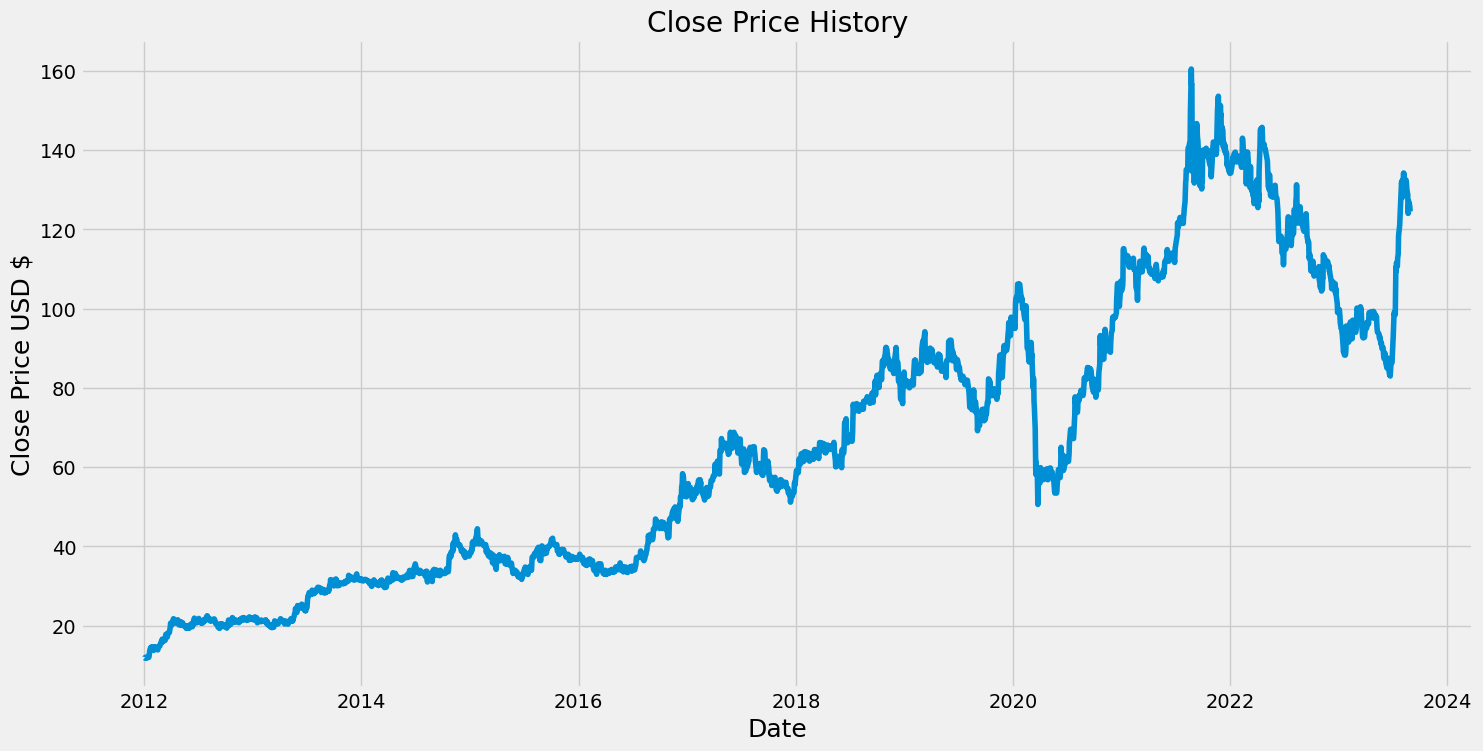

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the 'close column'
data = df.filter(['Close'])
#Convert the dataframe into numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2331

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[3.92518353e-04],
       [0.00000000e+00],
       [1.30842018e-03],
       ...,
       [7.74593619e-01],
       [7.66115684e-01],
       [7.58377843e-01]])

In [8]:
#Fit the Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[3.92518353e-04],
       [0.00000000e+00],
       [1.30842018e-03],
       ...,
       [7.74593619e-01],
       [7.66115684e-01],
       [7.58377843e-01]])

In [9]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([3.92518353e-04, 0.00000000e+00, 1.30842018e-03, 1.52648379e-03,
       1.17757431e-03, 8.72177448e-05, 1.30842018e-03, 1.09034373e-03,
       1.26480489e-03, 1.43925321e-03, 4.36139417e-03, 8.72280117e-03,
       1.30405929e-02, 1.76636788e-02, 1.43490131e-02, 1.77945182e-02,
       1.63988675e-02, 1.94082390e-02, 1.61371886e-02, 1.54393632e-02,
       1.31278170e-02, 1.31278170e-02, 1.46106984e-02, 1.92773996e-02,
       1.74456088e-02, 1.85359589e-02, 1.84923436e-02, 1.76636788e-02,
       1.63552586e-02, 1.51776779e-02, 1.58755033e-02, 1.39564883e-02,
       1.67913987e-02, 2.04985892e-02, 2.12836387e-02, 2.06730439e-02,
       2.22431558e-02, 2.67354023e-02, 2.84363408e-02, 2.69098506e-02,
       2.69098506e-02, 3.22307747e-02, 3.13584818e-02, 2.83491102e-02,
       2.93522426e-02, 3.00936833e-02, 3.19690830e-02, 3.03989711e-02,
       3.57635041e-02, 4.03429747e-02, 3.56762735e-02, 3.66903017e-02,
       3.57089865e-02, 3.89473239e-02, 4.27253949e-02, 4.25291293e-02,
     

In [10]:
#Convert hte x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2271, 60, 1)

In [12]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the Model
model.fit(x_train, y_train, batch_size=250, epochs=1000)

Epoch 1/1000
10/10 [==============================] - 9s 14ms/step - loss: 0.0379
Epoch 2/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.0058
Epoch 3/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 4/1000
10/10 [==============================] - 0s 10ms/step - loss: 8.5115e-04
Epoch 5/1000
10/10 [==============================] - 0s 8ms/step - loss: 4.7582e-04
Epoch 6/1000
10/10 [==============================] - 0s 9ms/step - loss: 3.9725e-04
Epoch 7/1000
10/10 [==============================] - 0s 9ms/step - loss: 3.6042e-04
Epoch 8/1000
10/10 [==============================] - 0s 8ms/step - loss: 3.4919e-04
Epoch 9/1000
10/10 [==============================] - 0s 9ms/step - loss: 3.4192e-04
Epoch 10/1000
10/10 [==============================] - 0s 8ms/step - loss: 3.3586e-04
Epoch 11/1000
10/10 [==============================] - 0s 10ms/step - loss: 3.2974e-04
Epoch 12/1000
10/10 [==============================] - 0s 8ms/step - l

In [15]:
#Create the testing data set
#Create a new array containing scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [17]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

2.5838889039671358

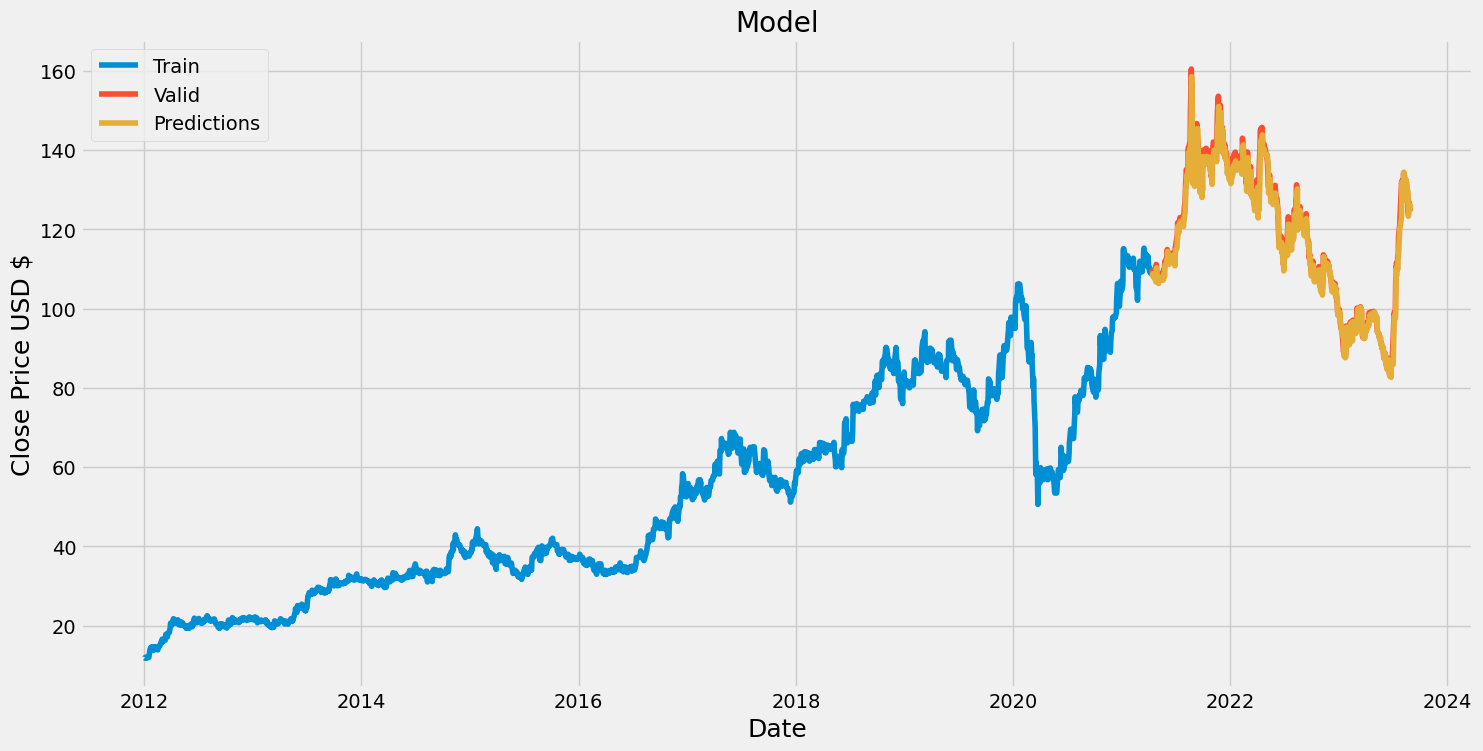

In [20]:
#Plot the data
train = data[:training_data_len]
x_valid = data[training_data_len:]

import pandas as pd

# Assuming you have a column named 'Close' in the 'data' DataFrame
valid = pd.DataFrame()
valid['Close'] = data[training_data_len:]['Close']
valid['Predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.show()

In [21]:
#Show the valid predicted price
valid

,Close,Predictions
Date,,
2021-04-13,108.830002,107.927383
2021-04-14,109.500000,108.150497
2021-04-15,109.019997,108.814529
2021-04-16,109.180000,108.152000
2021-04-19,108.629997,108.409462
...,...,...
2023-08-23,124.080002,123.295380
2023-08-24,126.070000,124.137230
2023-08-25,126.949997,125.986473


In [22]:
import yfinance as yf

# Download the data for the 'MEBL.KA' stock from a different date range
mebl_quote = yf.download('MEBL.KA', start='2023-08-29', end='2023-08-31')

# Continue with the rest of your code using the 'apple_quote' DataFrame
# ...

# Print the 'Close' column
print(mebl_quote['Close'])


[*********************100%%**********************]  1 of 1 completed
Date
2023-08-29    124.540001
2023-08-30    122.430000
Name: Close, dtype: float64
